# DEEP LEARNING OVERVIEW

## Dropout

- What is Dropout?
- What is it used for?
- How does it work?

# What is Dropout?

- Dropout is a method of randomly ignoring neuron units during training. 
- It is a type of "regularization"
- was introduced in this paper by Nitish Srivastava (http://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)

# Why do we Dropout?

### To prevent over-fitting.

While training, neurons can become co-dependent on each other. This leads to a network with specialized training for its training set, but may perform poorly with new data. 

- 1 option is to train for longer and with more data
- Another option is to introduce Dropout

# How does it work?

<img src="dropout.png" width=1200>

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%config InlineBackend.figure_format = 'svg'

Using TensorFlow backend.


In [2]:
# split the training and testing data into X (image) and Y (label) arrays
train_df = pd.read_csv(r'data\fashion-mnist_train.csv')
test_df = pd.read_csv(r'data\fashion-mnist_test.csv')

train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345,
)

im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

In [21]:
cnn_model_40 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.4, name='Dropout'),
    Flatten(name='flatten'),
    Dense(32, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name='Dropout_40')

cnn_model_20 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout'),
    Flatten(name='flatten'),
    Dense(32, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name='Dropout_20')

cnn_model_00 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Flatten(name='flatten'),
    Dense(32, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name='Dropout_00')

cnn_models = [cnn_model_40, cnn_model_20, cnn_model_00]

In [25]:
cnn_model_40.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
MaxPool (MaxPooling2D)       (None, 13, 13, 32)        0         
_________________________________________________________________
Dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
Dense (Dense)                (None, 32)                173088    
_________________________________________________________________
Output (Dense)               (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________


In [26]:
cnn_model_20.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
MaxPool (MaxPooling2D)       (None, 13, 13, 32)        0         
_________________________________________________________________
Dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
Dense (Dense)                (None, 32)                173088    
_________________________________________________________________
Output (Dense)               (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________


In [27]:
cnn_model_00.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
MaxPool (MaxPooling2D)       (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
Dense (Dense)                (None, 32)                173088    
_________________________________________________________________
Output (Dense)               (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________


In [23]:
# train the models and save results to a dict

history_dict = {}

for model in cnn_models:
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )
    
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=50, verbose=1,
        validation_data=(x_validate, y_validate)
    )
    
    history_dict[model.name] = history

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 38us/step - loss: 0.7891 - acc: 0.7258 - val_loss: 0.4874 - val_acc: 0.8294
Epoch 2/50
48000/48000 [==============================] - 1s 27us/step - loss: 0.4696 - acc: 0.8358 - val_loss: 0.4205 - val_acc: 0.8511
Epoch 3/50
48000/48000 [==============================] - 1s 27us/step - loss: 0.4138 - acc: 0.8547 - val_loss: 0.3748 - val_acc: 0.8695
Epoch 4/50
48000/48000 [==============================] - 1s 27us/step - loss: 0.3831 - acc: 0.8650 - val_loss: 0.3562 - val_acc: 0.8748
Epoch 5/50
48000/48000 [==============================] - 1s 27us/step - loss: 0.3604 - acc: 0.8738 - val_loss: 0.3325 - val_acc: 0.8852
Epoch 6/50
48000/48000 [==============================] - 1s 27us/step - loss: 0.3460 - acc: 0.8782 - val_loss: 0.3210 - val_acc: 0.8882
Epoch 7/50
48000/48000 [==============================] - 1s 27us/step - loss: 0.3309 - acc: 0.8834 - val_loss: 0.3092 - val_acc

Epoch 10/50
48000/48000 [==============================] - 1s 26us/step - loss: 0.2677 - acc: 0.9043 - val_loss: 0.2740 - val_acc: 0.9043
Epoch 11/50
48000/48000 [==============================] - 1s 26us/step - loss: 0.2591 - acc: 0.9076 - val_loss: 0.2717 - val_acc: 0.9038
Epoch 12/50
48000/48000 [==============================] - 1s 27us/step - loss: 0.2534 - acc: 0.9091 - val_loss: 0.2679 - val_acc: 0.9022
Epoch 13/50
48000/48000 [==============================] - 1s 28us/step - loss: 0.2456 - acc: 0.9126 - val_loss: 0.2706 - val_acc: 0.9028
Epoch 14/50
48000/48000 [==============================] - 1s 28us/step - loss: 0.2416 - acc: 0.9133 - val_loss: 0.2643 - val_acc: 0.9065
Epoch 15/50
48000/48000 [==============================] - 1s 27us/step - loss: 0.2337 - acc: 0.9159 - val_loss: 0.2617 - val_acc: 0.9068
Epoch 16/50
48000/48000 [==============================] - 1s 27us/step - loss: 0.2291 - acc: 0.9184 - val_loss: 0.2578 - val_acc: 0.9070
Epoch 17/50
48000/48000 [=========

48000/48000 [==============================] - 1s 24us/step - loss: 0.2118 - acc: 0.9246 - val_loss: 0.2597 - val_acc: 0.9069
Epoch 20/50
48000/48000 [==============================] - 1s 24us/step - loss: 0.2054 - acc: 0.9272 - val_loss: 0.2634 - val_acc: 0.9062
Epoch 21/50
48000/48000 [==============================] - 1s 24us/step - loss: 0.2041 - acc: 0.9265 - val_loss: 0.2595 - val_acc: 0.9056
Epoch 22/50
48000/48000 [==============================] - 1s 24us/step - loss: 0.1986 - acc: 0.9296 - val_loss: 0.2561 - val_acc: 0.9070
Epoch 23/50
48000/48000 [==============================] - 1s 24us/step - loss: 0.1920 - acc: 0.9323 - val_loss: 0.2555 - val_acc: 0.9092
Epoch 24/50
48000/48000 [==============================] - 1s 24us/step - loss: 0.1864 - acc: 0.9341 - val_loss: 0.2529 - val_acc: 0.9096
Epoch 25/50
48000/48000 [==============================] - 1s 24us/step - loss: 0.1844 - acc: 0.9351 - val_loss: 0.2515 - val_acc: 0.9094
Epoch 26/50
48000/48000 [=====================

In [46]:
plt.rcParams.update({'font.size': 15})
def plot_results():
    for history in history_dict:
        val_acc = history_dict[history].history['val_acc']
        val_loss = history_dict[history].history['val_loss']
        ax1.plot(val_acc, label=history, lw=2)
        ax2.plot(val_loss, label=history, lw=2)

    ax1.set_ylabel('validation accuracy', fontsize=17)
    ax2.set_ylabel('validation loss', fontsize=17)
    ax2.set_xlabel('epochs')
    ax1.legend()
    ax2.legend()
    plt.show()

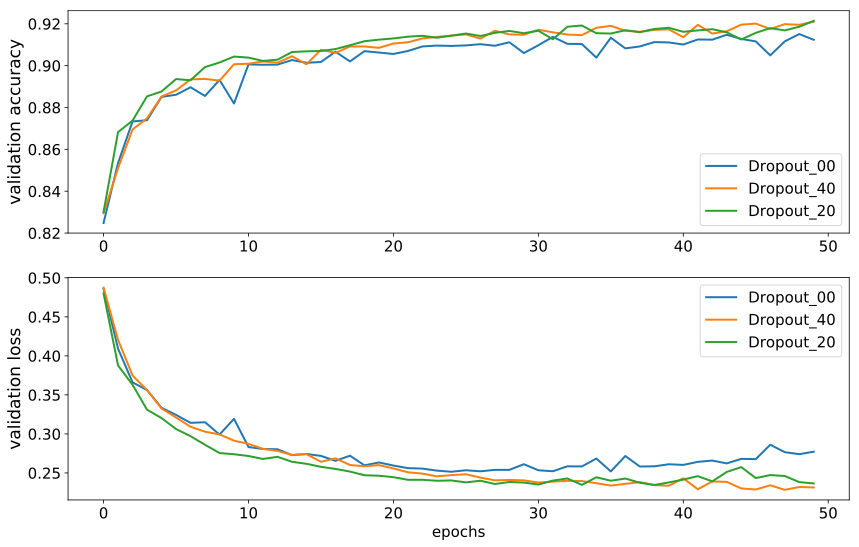

In [47]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(14, 9))
plot_results()